# EXERCISE 6

Use Seaborn to create graphical visualizations of the results:

of the physical training dataset where you can visualize all the exercises

and their relationship between calorie burning and exercise intensity,

distinguishing between men and women.

Note: this dataset doesn't make sense, as the variables are not correlated. Which seems wrong to me.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
!pwd
df = pd.read_csv('data/exercise_dataset_issue_6.csv')

/Users/rosasampaio/Documents/curso pt/Python Visualization/projeto/github/simple_data_visualization_python


In [6]:
df.head()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   str    
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   str    
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   str    
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), str(3)
memory usage: 362.4 KB


In [9]:
df.columns = df.columns.str.replace(' ', '_')
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   str    
 2   Calories_Burn       3864 non-null   float64
 3   Dream_Weight        3864 non-null   float64
 4   Actual_Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   str    
 7   Duration            3864 non-null   int64  
 8   Heart_Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather_Conditions  3864 non-null   str    
 11  Exercise_Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), str(3)
memory usage: 362.4 KB


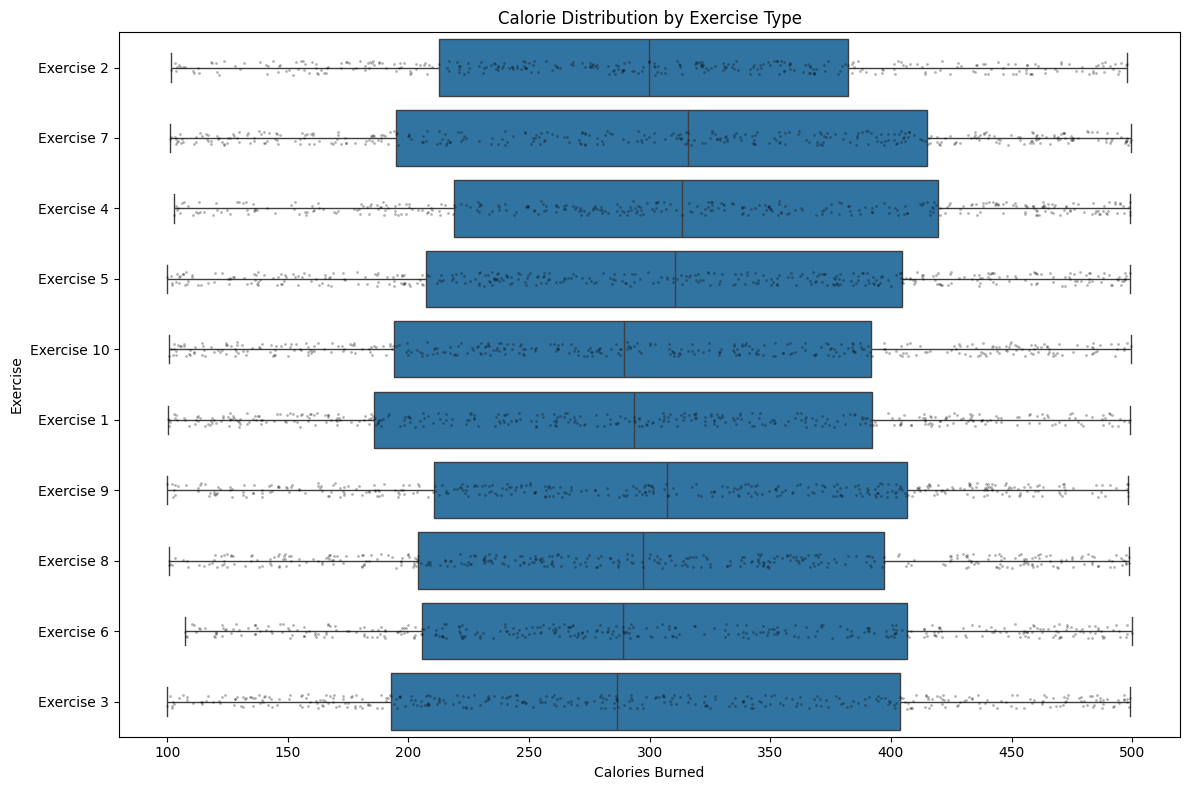

In [10]:
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=df,
    y='Exercise',
    x='Calories_Burn',
    showfliers=False
)

sns.stripplot(
    data=df,
    y='Exercise',
    x='Calories_Burn',
    color='black',
    size=2,
    alpha=0.3
)

plt.title('Calorie Distribution by Exercise Type')
plt.xlabel('Calories Burned')
plt.ylabel('Exercise')

plt.tight_layout()
plt.show()

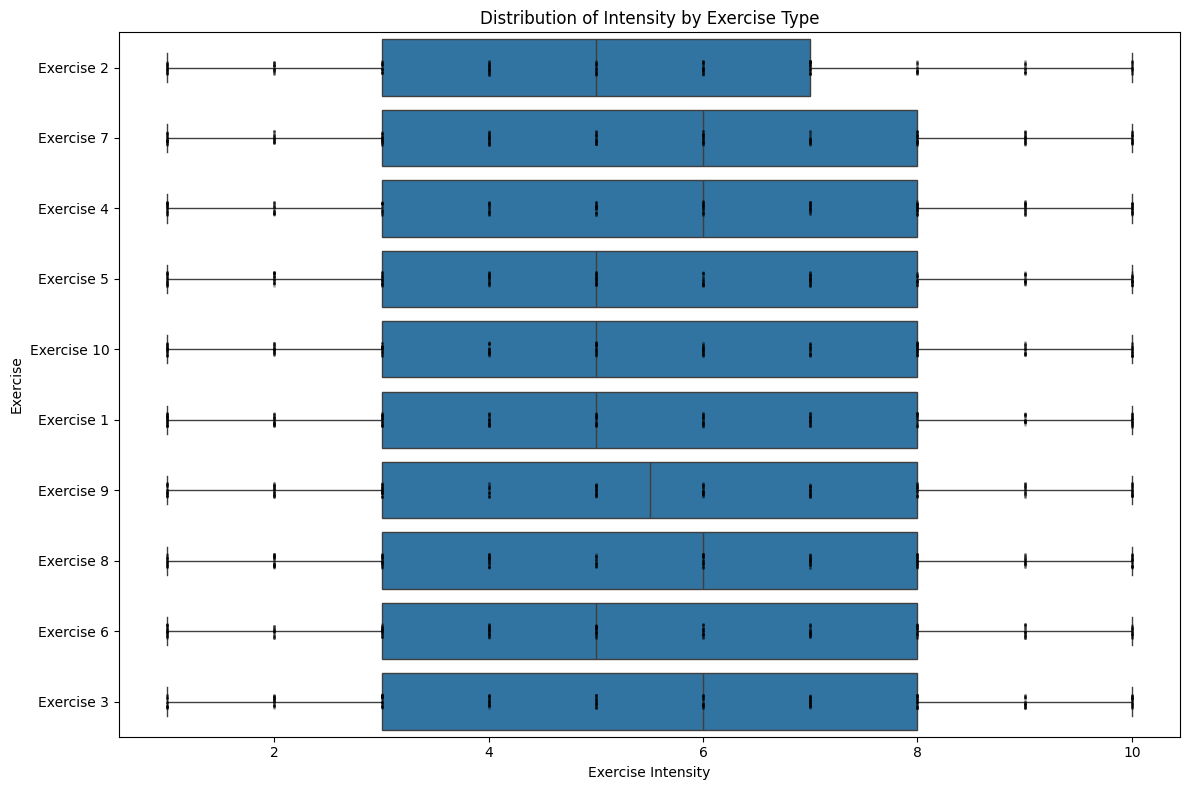

In [11]:
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=df,
    y='Exercise',
    x='Exercise_Intensity',
    showfliers=False
)

sns.stripplot(
    data=df,
    y='Exercise',
    x='Exercise_Intensity',
    color='black',
    size=2,
    alpha=0.3
)

plt.title('Distribution of Intensity by Exercise Type')
plt.xlabel('Exercise Intensity')
plt.ylabel('Exercise')

plt.tight_layout()
plt.show()

# confirmation of outliers


In [12]:
df['Calories_Burn'].describe()

count    3864.000000
mean      301.861806
std       115.828604
min       100.009403
25%       202.168837
50%       299.742508
75%       404.143688
max       499.859262
Name: Calories_Burn, dtype: float64

In [13]:
Q1 = df['Calories_Burn'].quantile(0.25)
Q3 = df['Calories_Burn'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(lower, upper)

-100.79343932500001 707.105964075


## Result Analysis -> Checking for Outliers

IF:

- lower ≈ min (-100.79343932500001 < min 100.009403)
- upper ≈ max (707.105964075 > max 499.859262 )

So the whiskers were already going almost to the extremes.

lower = -100.79
min = 100.00

upper = 707.10
max = 499.85

What does this mean?

Remember the standard boxplot rule:

Whiskers go up to:

- Q1 − 1.5 × IQR
- Q3 + 1.5 × IQR

In your case:

- The calculated lower limit (-100) is much smaller than the actual minimum (100)

- The calculated upper limit (707) is larger than the actual maximum (499)

Correct interpretation:

- This means that: All values ​​are within Q1 ± 1.5 IQR

That is: There are no outliers according to the 1.5 × IQR rule

<Axes: xlabel='Calories_Burn', ylabel='Exercise'>

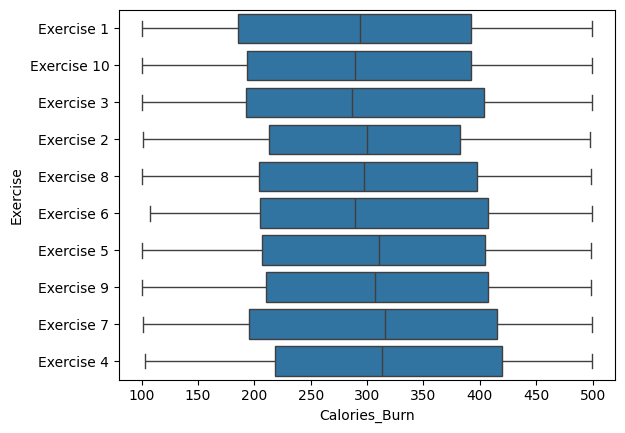

In [14]:
order = df.groupby('Exercise')['Calories_Burn'].mean().sort_values().index

sns.boxplot(
    data=df,
    y='Exercise',
    x='Calories_Burn',
    order=order
)

## Results Analysis

This means:
- Very similar variability
- Distributions with a similar shape

In real data, we would expect:
- HIIT → highest distribution
- Yoga → lowest
- Running → greatest variability

Here everything is very homogeneous.

Whiskers almost identical

All range approximately from 100 to 500 calories
- This is extremely uniform across categories.

- It's a strong sign of random generation.

Objective statistical interpretation: The type of exercise does not explain variation in calories burned, which in the real world is totally false.

If it were real, we would expect:
- Boxes shifted vertically
- Consistent difference in medians
- Partial overlap, not total overlap
- Here there is almost complete overlap

There is no visual or statistical evidence of a causal relationship.

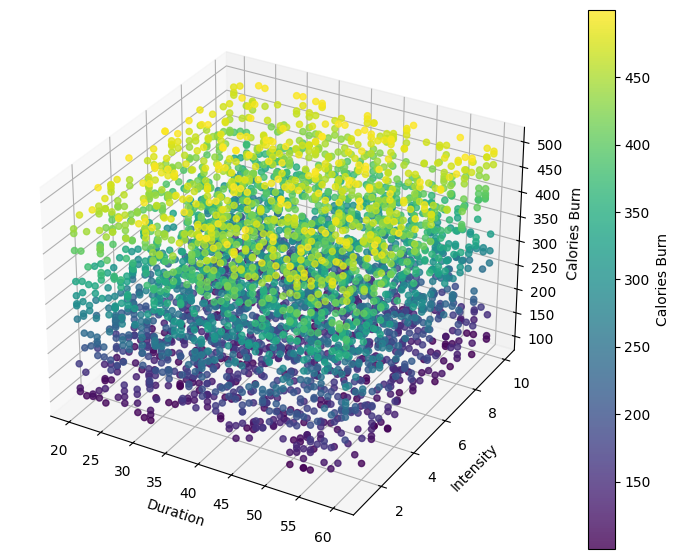

In [18]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df['Duration'],
    df['Exercise_Intensity'],
    df['Calories_Burn'],
    c=df['Calories_Burn'],    
    cmap='viridis',            
    alpha=0.8
)

ax.set_xlabel('Duration')
ax.set_ylabel('Intensity')
ax.set_zlabel('Calories Burn')

fig.colorbar(sc, ax=ax, label='Calories Burn')

plt.show()

## Result Analysis
Axes:

- X → Duration
- Y → Intensity
- Z → Calories_Burn
- Color → also Calories_Burn

- A uniformly spread volumetric cloud.

- This indicates an absence of structured relationships.

There is no plane or curvature.

This graph indicates:
- No visible non-linear trend
- No combined duration × intensity effect

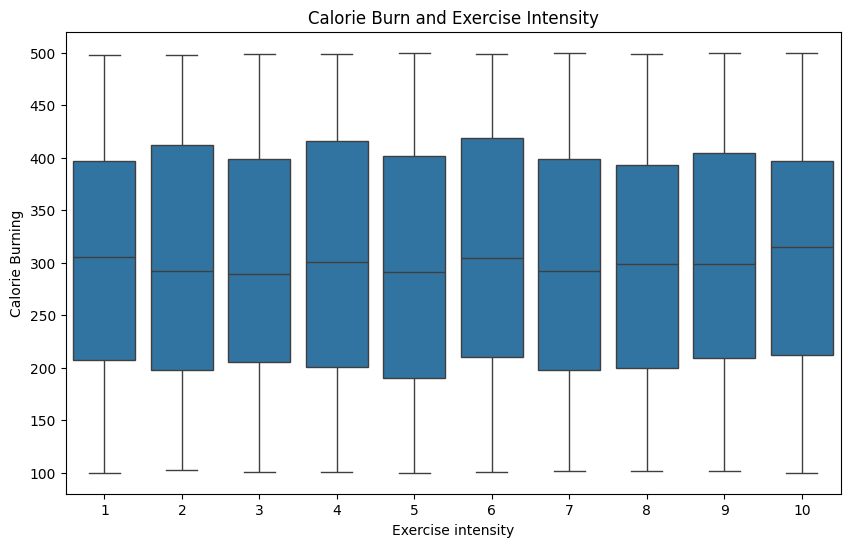

In [17]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df,
    x='Exercise_Intensity',
    y='Calories_Burn'
)

plt.title('Calorie Burn and Exercise Intensity')
plt.xlabel('Exercise intensity')
plt.ylabel('Calorie Burning')

plt.show()

Show:

Shape of the distribution

Concentration of values

Asymmetry

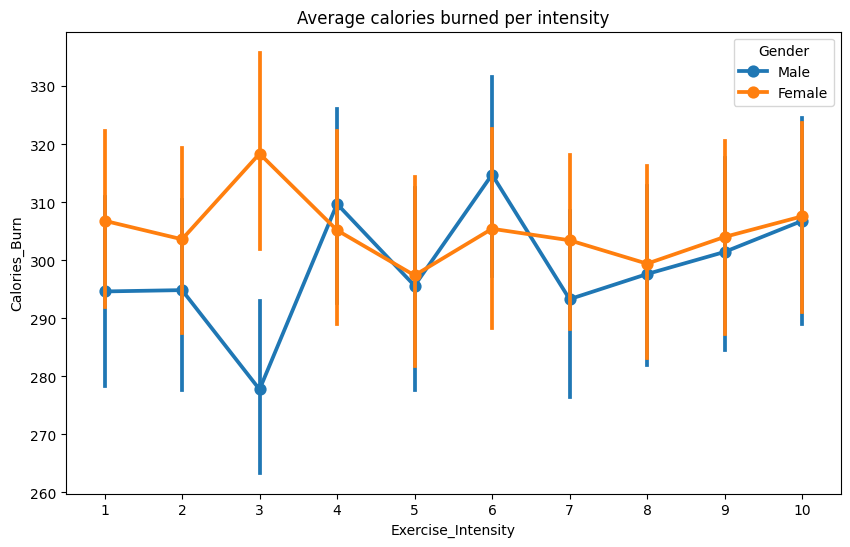

In [19]:
plt.figure(figsize=(10,6))

sns.pointplot(
    data=df,
    x='Exercise_Intensity',
    y='Calories_Burn',
    errorbar='ci',
    hue='Gender'
)

plt.title('Average calories burned per intensity')
plt.show()

# Results Analysis

- Typically: Intensity↑⇒Calories↑

- The differences between intensities are small and possibly random.

I can't understand how intensity 10 can burn fewer calories than intensity 6. The dataset was probably poorly created and/or uses random numbers.

Men tend to burn more calories during exercise than women. This is mainly due to differences in body composition and physique. However, at intensity level 3, based on random data, women burn more calories than men. There is a significant difference between the measures.

# Gender 

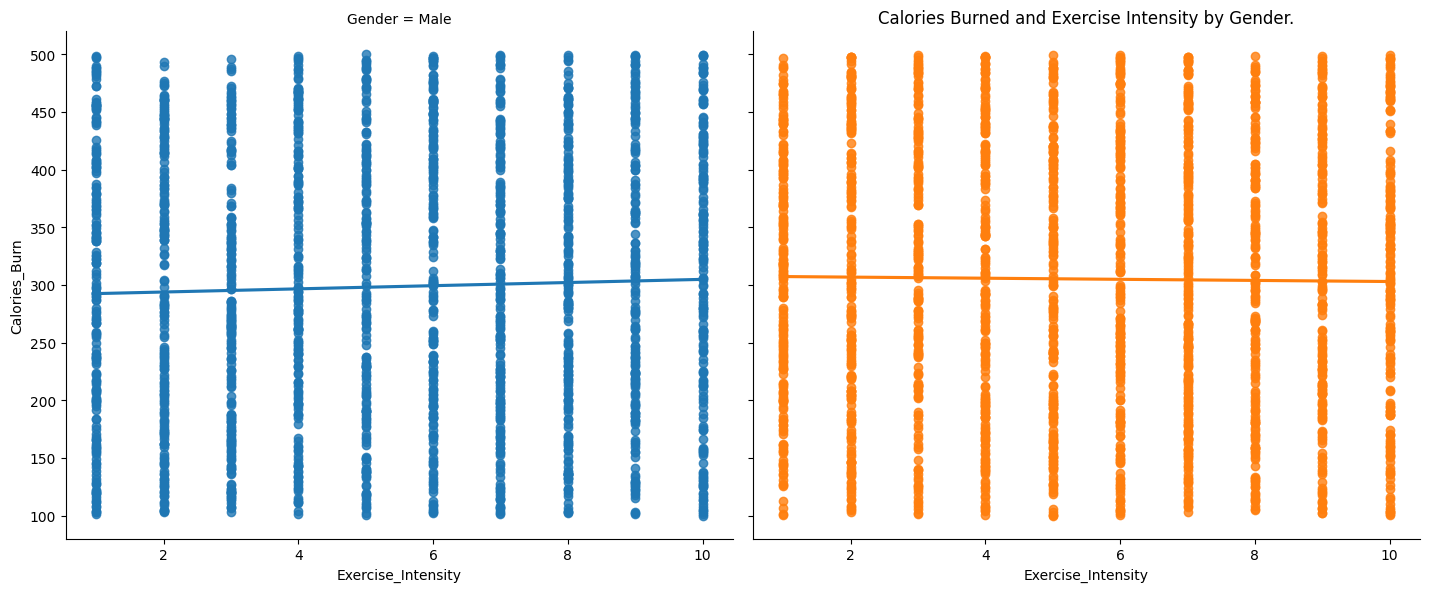

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    data=df,
    x='Exercise_Intensity',
    y='Calories_Burn',
    col='Gender',       
    hue='Gender', 
    ci=None,           
    height=6,
    aspect=1.2
)

plt.title('Calories Burned and Exercise Intensity by Gender.')
plt.show()

# Results Analysis

Clearly, calorie burning among men follows a positive trend, while for women the trend is negative; that is, intensity increases and calorie expenditure decreases. This doesn't make sense.

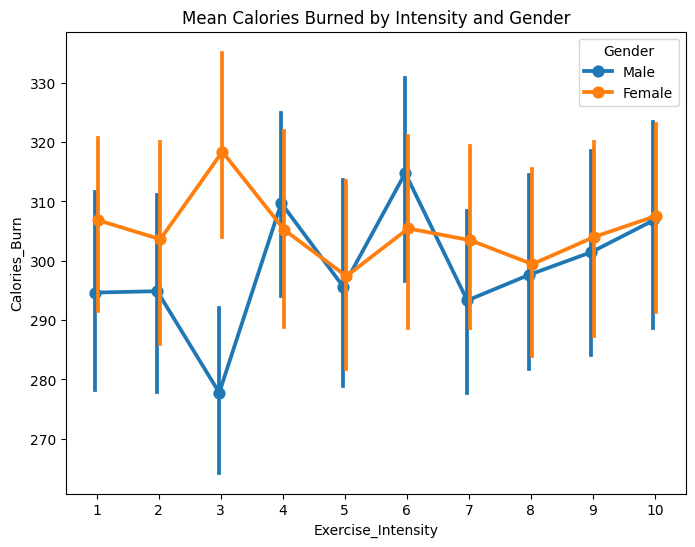

In [21]:
plt.figure(figsize=(8,6))

sns.pointplot(
    data=df,
    x='Exercise_Intensity',
    y='Calories_Burn',
    hue='Gender',
    errorbar='ci',
    dodge=True
)

plt.title('Mean Calories Burned by Intensity and Gender')
plt.show()

Close overlap between genders at intensities 5, 10, and 8.

No overlap at intensity level 3, where women burned more calories (inaccurate, perhaps due to the random dataset).

At other intensity levels, calorie expenditure is similar between men and women. (fictitious)

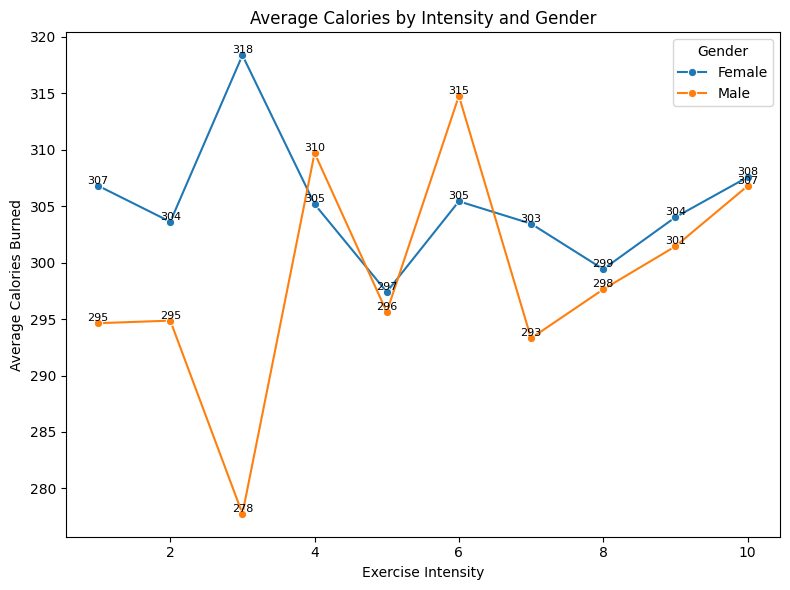

In [22]:
df_mean = (
    df.groupby(['Exercise_Intensity','Gender'])['Calories_Burn']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,6))

ax = sns.lineplot(
    data=df_mean,
    x='Exercise_Intensity',
    y='Calories_Burn',
    hue='Gender',
    marker='o'
)

for _, row in df_mean.iterrows():
    ax.text(
        row['Exercise_Intensity'],
        row['Calories_Burn'],
        f"{row['Calories_Burn']:.0f}",
        fontsize=8,
        ha='center',
        va='bottom'
    )

plt.title('Average Calories by Intensity and Gender')
plt.xlabel('Exercise Intensity')
plt.ylabel('Average Calories Burned')

plt.tight_layout()
plt.show()

# Results Analysis
The differences between genders are visible when only the averages by gender were analyzed.

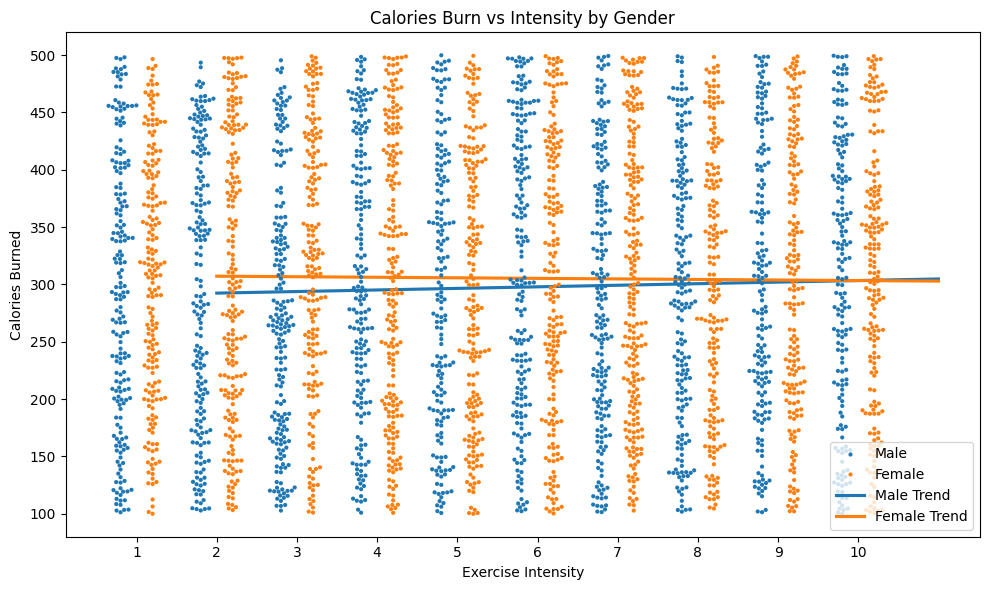

In [23]:
# DRAFT
plt.figure(figsize=(10,6))

sns.swarmplot(
    data=df,
    x='Exercise_Intensity',
    y='Calories_Burn',
    hue='Gender',
    dodge=True,
    size=3
)

sns.regplot(
    data=df[df['Gender']=='Male'],
    x='Exercise_Intensity',
    y='Calories_Burn',
    scatter=False,
    label='Male Trend',
    ci=None
)

sns.regplot(
    data=df[df['Gender']=='Female'],
    x='Exercise_Intensity',
    y='Calories_Burn',
    scatter=False,
    label='Female Trend',
    ci=None
)

plt.title('Calories Burn vs Intensity by Gender')
plt.xlabel('Exercise Intensity')
plt.ylabel('Calories Burned')

plt.legend()
plt.tight_layout()
plt.show()

/Users/rosasampaio/Documents/curso pt/Python Visualization/projeto/github/simple_data_visualization_python/.venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/rosasampaio/Documents/curso pt/Python Visualization/projeto/github/simple_data_visualization_python/.venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


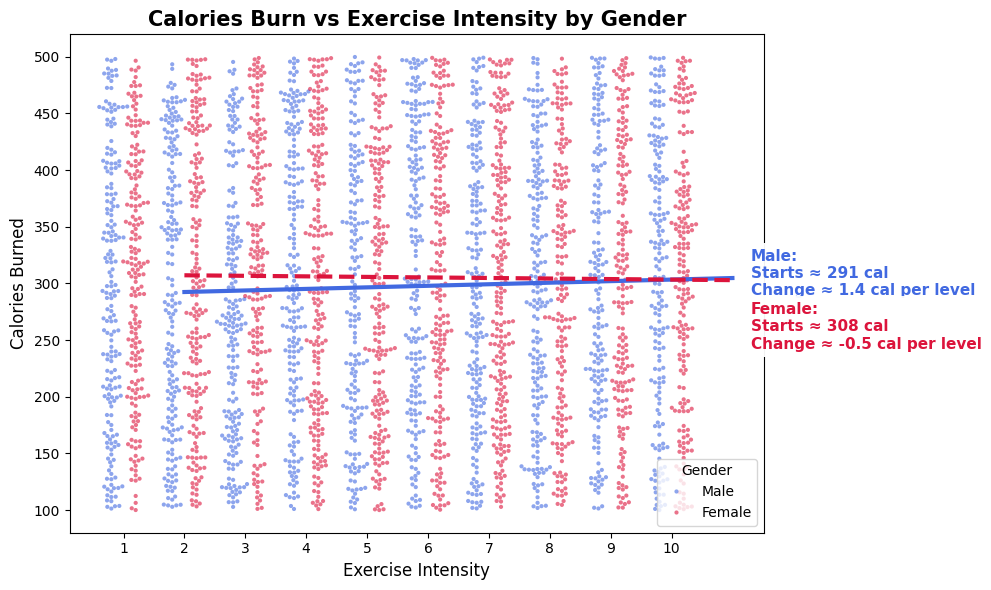

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10, 6))

sns.swarmplot(
    data=df,
    x='Exercise_Intensity',
    y='Calories_Burn',
    hue='Gender',
    dodge=True,
    size=3,
    alpha=0.60,
    palette={'Male': 'royalblue', 'Female': 'crimson'}
)

def add_trend_summary(data, gender, color, linestyle):

    d = data[data['Gender'] == gender]
    X = d[['Exercise_Intensity']]
    y = d['Calories_Burn']

    model = LinearRegression()
    model.fit(X, y)

    x_vals = np.sort(d['Exercise_Intensity'].unique())
    y_pred = model.predict(x_vals.reshape(-1, 1))

   # Trend line
    plt.plot(
        x_vals,
        y_pred,
        color=color,
        linewidth=3,
        linestyle=linestyle,
        zorder=6
    )
    
    b0 = model.intercept_
    b1 = model.coef_[0]

    summary_text = (
        f"{gender}:\n"
        f"Starts ≈ {b0:.0f} cal\n"
        f"Change ≈ {b1:.1f} cal per level"
    )
    offset = 4 if gender == 'Male' else -41
    
    plt.text(
        10.3,
        y_pred[-1] + offset,
        summary_text,
        color=color,
        fontsize=11,
        fontweight='bold',
        va='center',
        bbox=dict(facecolor='white', alpha=0.95, edgecolor='none', pad=4)
    )

add_trend_summary(df, 'Male', 'royalblue', '-')
add_trend_summary(df, 'Female', 'crimson', '--')


plt.title(
    'Calories Burn vs Exercise Intensity by Gender',
    fontsize=15,
    fontweight='bold'
)

plt.xlabel('Exercise Intensity', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)

plt.legend(title='Gender', loc='lower right', frameon=True)

plt.tight_layout()
plt.show()

Men:

- +1.4 calories per intensity level

Women:

- −0.5 calories per level

This is irrelevant.

Initial difference between genders is small
- Men start ≈ ​​291 cal
- Women start ≈ ​​308 cal

Difference ≈ 17 calories

This is small compared to the total variation observed (~100 to 500).

Huge dispersion

The points show:
- High variability
- Values ​​spread equally across all intensities
- Total overlap between genders

Conclusion: Increasing intensity has no significant impact on calorie expenditure, and the difference between genders is minimal. In the real world, this is considered incorrect.

The observed negative linear regression does not represent a real causal relationship between intensity and calorie burn, but rather a statistical effect resulting from the use of random and independent data.

When variables are generated without any causal link, regression fits a line to the sample noise, potentially producing positive or negative slopes due to random fluctuation.

In the real world, however, this conclusion would be invalid from a physiological standpoint, as there is consistent scientific evidence demonstrating that increased exercise intensity is associated with greater energy expenditure.

Thus, the negative slope does not reflect true biological behavior, but only the absence of causal structure in the data used.